## Import all Dependencies

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, train_test_split

## Examine The Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("train_shape: ", train_df.shape)
print("test_shape: ", test_df.shape)

train_shape:  (891, 12)
test_shape:  (418, 11)


## Basic Data Exploration

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### This includes 7/12 , showing that 5 other columns are categorical  variables count, shows how many rows have non-missing     values
### The mean calculates the average. std is the standard deviation, which measures how numerically spread out the values are. you will  understand that shortly min, 25%, 50%, 75% and max values imagine sorting each column from lowest to highest  value.The first(smallest) value is the min. if you go a quarter way through the list, you'll find a number that is bigger than 25% of the  values and smaller and 75% of the values. That is the 25% value(pronounced "25th percentile") The 50th and 75th percentiles are  defined analogously, and the max is the largest number

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## considering missing values.
## Note:
#### There are several ways to take care of the missing value, the one used here is fillna method i.e Filling missing values  with mean, mode et.c 

In [11]:
missing_value = train_df.isnull().sum()
missing_value[missing_value>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [12]:
avg_age = train_df["Age"].mean(axis=0)
print("The Average of Age is: ", avg_age)
train_df["Age"].fillna(avg_age,inplace=True)

The Average of Age is:  29.69911764705882


In [13]:
avg_age1 = test_df["Age"].mean(axis=0)
print("The Average of Age is: ", avg_age1)
test_df["Age"].fillna(avg_age1,inplace=True)

The Average of Age is:  30.272590361445783


In [14]:
train_df["Cabin"].fillna("Unknown", inplace=True)
test_df["Cabin"].fillna("Unknown", inplace=True)

In [15]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_df["Embarked"].fillna(train_df.Embarked.mode, inplace=True)

In [17]:
test_df["Fare"].fillna(train_df.Fare.mean(), inplace=True)

## Data Visualization 
### let's play around how to visualize data making use of various charts under seaborn, matplotlib.
## Target Value Survived 

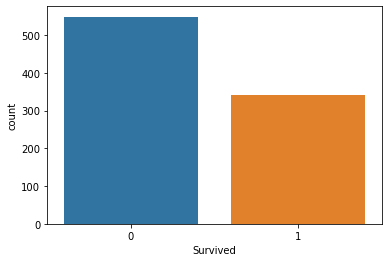

In [18]:
sns.countplot(data = train_df, x=train_df["Survived"])
plt.show()

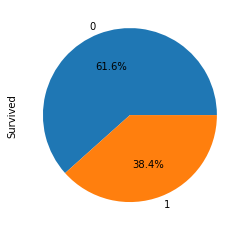

In [19]:
train_df["Survived"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

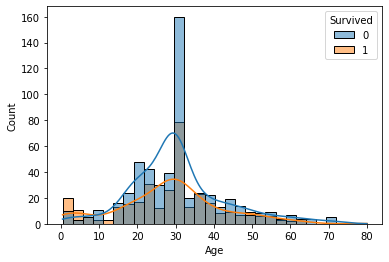

In [20]:
sns.histplot(data=train_df, x=train_df["Age"], hue= train_df["Survived"], kde = True)
plt.show()

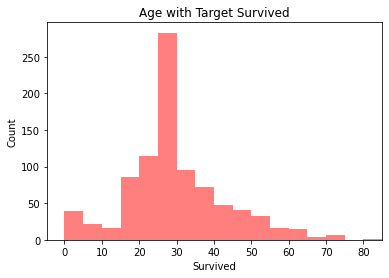

In [21]:
data = train_df.Age
bins = np.arange(-100, 100, 5)
plt.xlim([min(data)-5, max(data)+5])
hue = train_df.Survived

plt.hist(data, bins=bins, color="red", alpha=0.5)
plt.title("Age with Target Survived")
plt.xlabel("Survived")
plt.ylabel("Count")

plt.show()

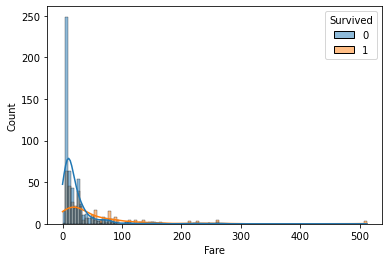

In [22]:
sns.histplot(data=train_df, x = train_df["Fare"], hue = train_df["Survived"], kde = True, color = "red")
plt.show()

### Data  Column sex

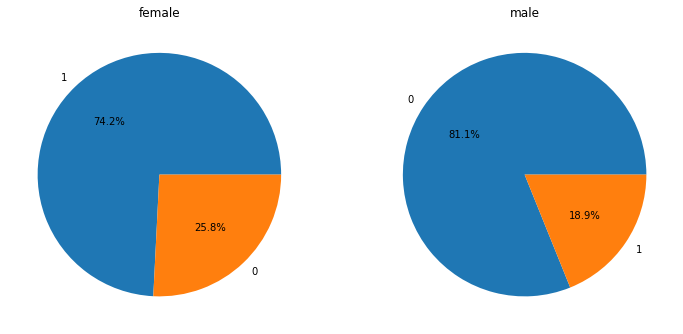

In [23]:
fig, axes = plt.subplots(1,2, figsize=(12,10))
cd = train_df.Sex.astype(str)
unique = np.unique(cd)

for i, ax in enumerate(axes.flatten()):
    values = train_df[train_df["Sex"]==unique[i]]["Survived"].value_counts()
    values.plot.pie(ax=ax, autopct="%1.1f%%")
    ax.set_title(str(unique[i]))
    ax.set_ylabel("")
    
    
plt.show()

## Data  Column Siblings and Spouse

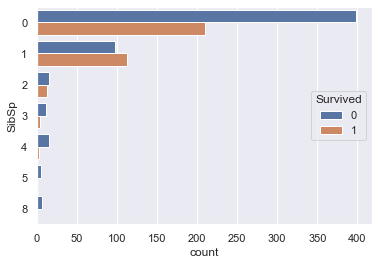

In [25]:
sns.set(style = "darkgrid")
sns.countplot(y="SibSp", hue="Survived", data= train_df)
plt.show()

## Data Column Parch

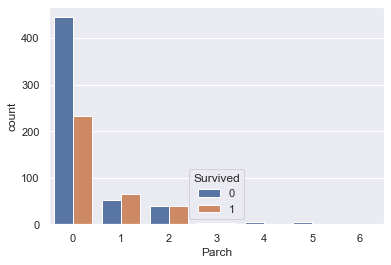

In [26]:
sns.set(style = "darkgrid")
sns.countplot(x="Parch", hue="Survived", data= train_df)
plt.show()

## Data Column Embarked

C:\Users\hp\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


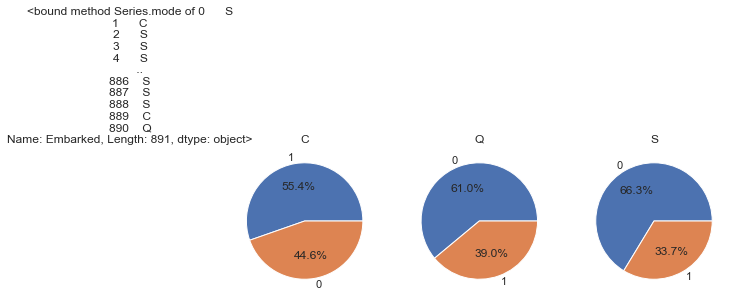

In [27]:
fig, axes = plt.subplots(1,4, figsize=(12,5))
pc = train_df.Embarked.astype(str)
unique = np.unique(pc)

for i, ax in enumerate(axes.flatten()):
    values = train_df[train_df["Embarked"]==unique[i]]["Survived"].value_counts()
    values.plot.pie(ax=ax, autopct="%1.1f%%")
    ax.set_title(str(unique[i]))
    ax.set_ylabel("")
    
plt.show()

## Data Column PClass and HEATMAP

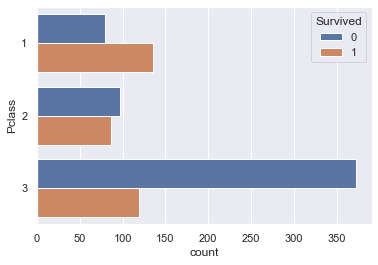

In [28]:
sns.set(style = "darkgrid")
sns.countplot(y="Pclass", hue="Survived", data=train_df)
plt.show()

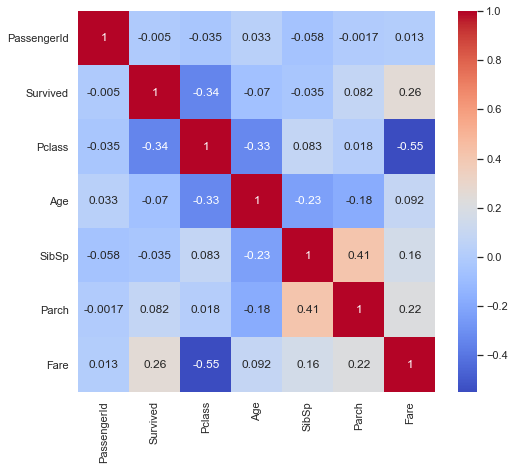

In [29]:
plt.figure(figsize=(8,7))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Handling categorical columns 
## Data Preprocessing 

In [30]:
Categorical_cols = train_df.select_dtypes(include="object")
Categorical_cols.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S


In [31]:
print("We have {} categorical columns out of {} total columns".format(len(Categorical_cols.columns),train_df.shape[1:]))

We have 5 categorical columns out of (12,) total columns


In [32]:
cols = ["Sex", "Embarked", "Cabin", "Ticket"]
for i in cols:
    le = LabelEncoder()
    train_df[i] = le.fit_transform(train_df[i].astype(str))

In [33]:
cols = ["Sex", "Embarked", "Ticket", "Cabin"]
for i in cols:
    le = LabelEncoder()
    test_df[i] = le.fit_transform(test_df[i].astype(str))

## Dropping unnecessary data columns

In [34]:
cols_to_drop = ["Name", "PassengerId"]
train_df.drop(cols_to_drop, 1, inplace=True)

In [35]:
cols_to_drop = ["Name", "PassengerId"]
test_df.drop(cols_to_drop, 1, inplace=True)

## Building the Machine Learning model
#### Scikit-learn is using the most popular library for modeling the types of data typically stored in DataFrames
#### The steps to building and using a model are:
#### Define What type of model will it be? Random Forest? some other type of model? some other parameters of the model type are specified too
#### Fit Capture patterns from provided data. This is the heart of modelling
#### Predict just what it sounds like
#### Evaluate Determine how accurate the model's predictions are:
#### We'll start with a model called the Random Forest. There are fancier models that give more accurate predictions. But 
#### Decision Tree, Random Forest, Logistic Regression are easy to understand and they are the basic building block for some of
#### the best models in data science 

In [36]:
x = train_df.drop("Survived", axis=1)
y =train_df["Survived"]

In [37]:
Rf = RandomForestClassifier(n_estimators=100, random_state=99)

In [38]:
Rf_result = cross_val_score(Rf, x,y, cv=10)
print("Random Forest Accuracy is: ", Rf_result)
Rf_result.mean()

Random Forest Accuracy is:  [0.82222222 0.82022472 0.75280899 0.87640449 0.8988764  0.86516854
 0.82022472 0.80898876 0.8988764  0.83146067]


0.8395255930087391

## Split data into training and validation data, for both features and target
### The split is based on a random number generator, supplying a numeric value to the random_state argument guarantees we get the same split every time we run script

In [40]:
train_x, val_x, train_y, val_y = train_test_split(x,y, random_state = 42)
Rf.fit(train_x, train_y)

RandomForestClassifier(random_state=99)

In [41]:
val_predictions = Rf.predict(val_x)
print(accuracy_score(val_y, val_predictions))

0.8251121076233184


## Making prediction on Test Data and saving to submission file

In [42]:
Rf.fit(x,y)

RandomForestClassifier(random_state=99)

In [43]:
test_yhat = Rf.predict(test_df)

## Algorithm Classification Performance Report

In [44]:
print(classification_report(val_y, val_predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       134
           1       0.82      0.72      0.77        89

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.83      0.82       223



## Features in hierachy of their importance

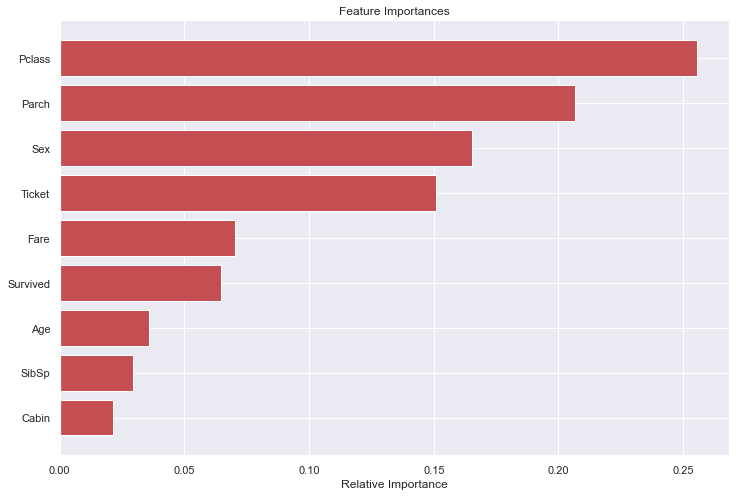

In [47]:
features = train_df.columns
importances = Rf.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(12,8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="r", align="center")
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Relative Importance")

plt.show()

## Saving and Loading Models

In [48]:
import pickle

In [49]:
pickle.dump(Rf, open("titanicmodel", "wb"))

In [51]:
model_path = pickle.load(open("titanicmodel", "rb"))

In [ ]:
cla